<a href="https://colab.research.google.com/github/etoileboots/tbilisi_biking/blob/main/segmentation_with_cityscapes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install zensvi

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of streetlevel to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of streetlevel to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of timezonefinder to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.8 MB/

In [3]:
from zensvi.cv import Segmenter

# initialize the segmenter
segmenter = Segmenter()

# set arguments
dir_input = "/content/drive/MyDrive/capstone/data/min_onroads_gsv_directory"
dir_image_output = "/content/drive/MyDrive/capstone/data/min_onroads_gsv_segmentation/images"
dir_summary_output = "/content/drive/MyDrive/capstone/data/min_onroads_gsv_segmentation/summary"
save_image_options = "segmented_image blend_image"  # segmented_image (colored image), blend_image (blended image)
pixel_ratio_save_format = "csv"
segmenter.segment(
    dir_input,
    dir_image_output=dir_image_output,
    dir_summary_output=dir_summary_output,
    save_image_options=save_image_options,
    #pixel_ratio_save_format=pixel_ratio_save_format,
)

Using CPU


Processing outer batches of size 400:   0%|          | 0/1 [00:00<?, ?it/s]

Processing outer batch #1:   0%|          | 0/400 [00:00<?, ?it/s]

<ipython-input-6-cfaa34d1e3ea>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=segmentation_long_df, x='block_group', y='coverage', hue='segmentation_class', ci='sd')


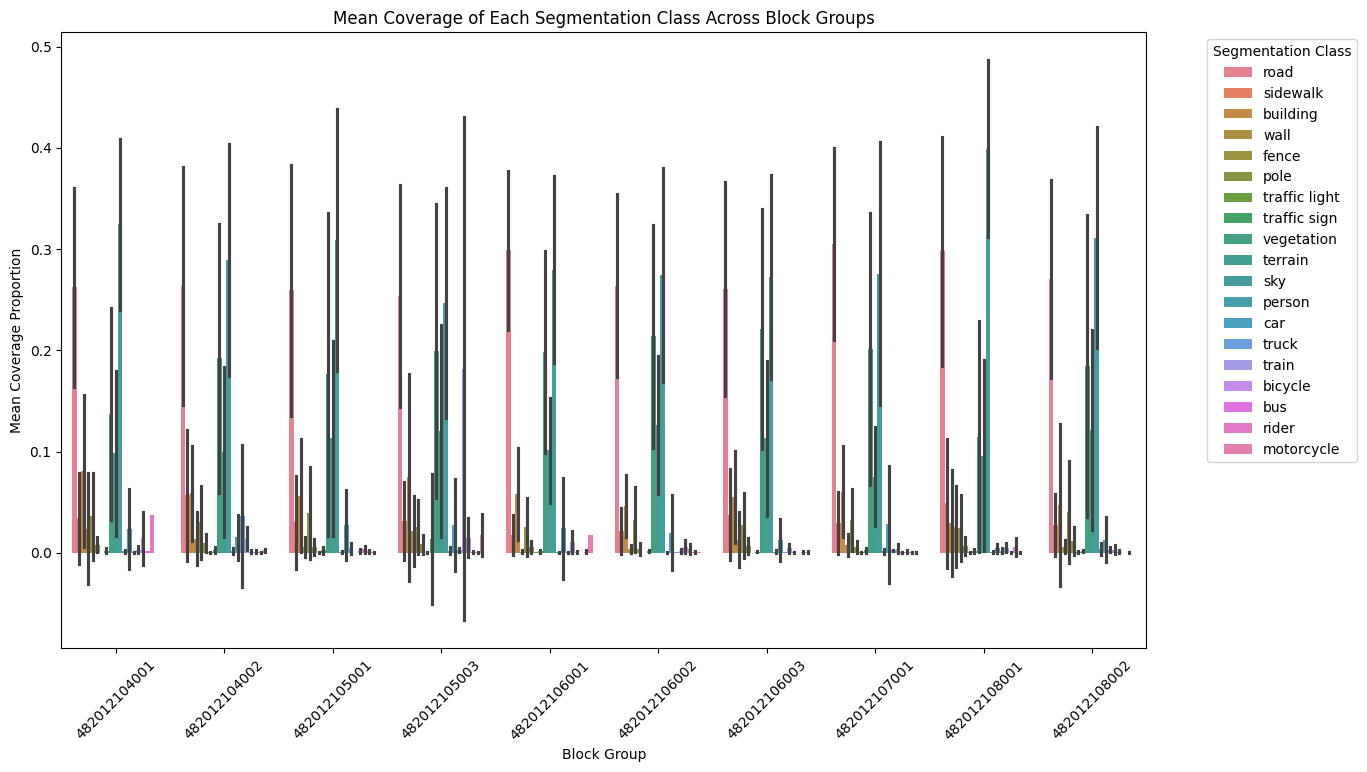

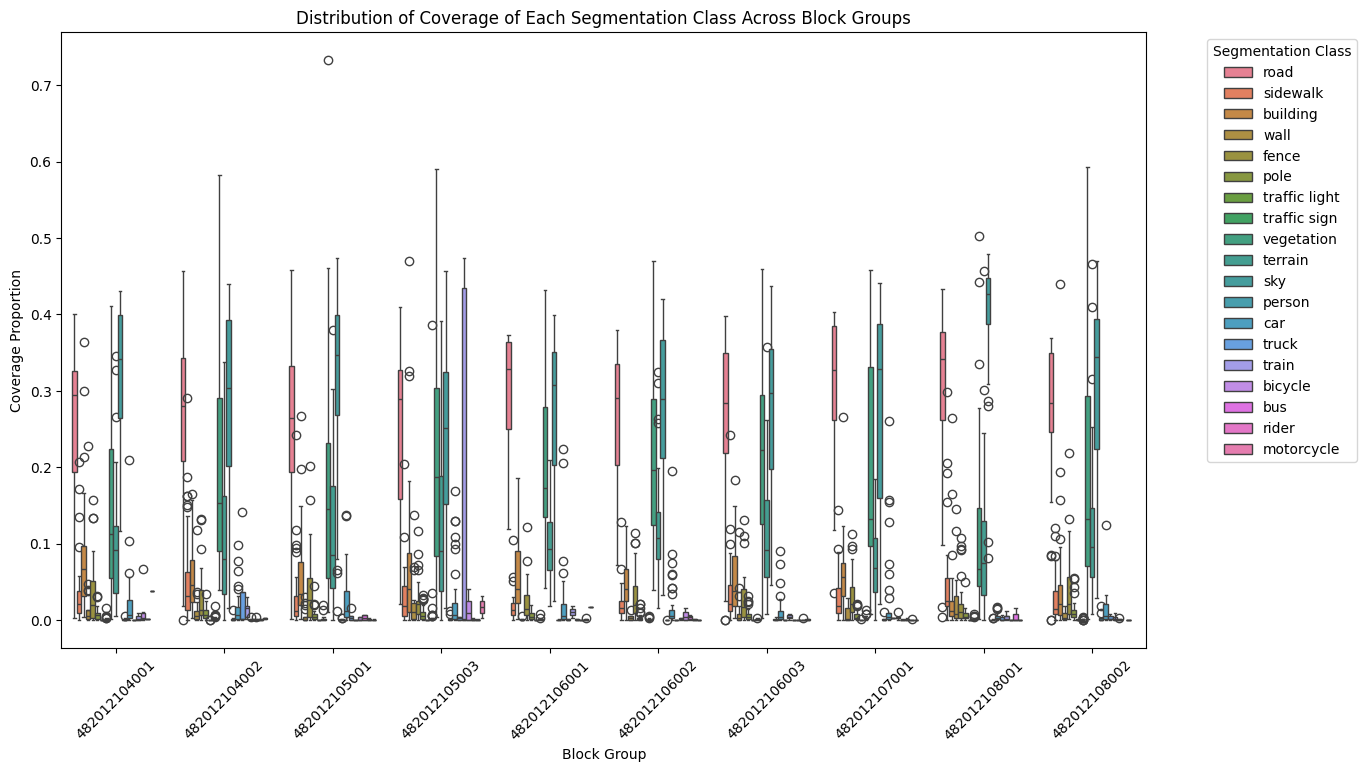

In [6]:


import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the JSON file with segmentation data
segmentation_file = "/content/drive/MyDrive/capstone/data/min_onroads_gsv_segmentation/summary/pixel_ratios.json"
with open(segmentation_file, 'r') as file:
    segmentation_data = json.load(file)

# Convert the JSON data into a DataFrame
segmentation_df = pd.DataFrame(segmentation_data).T
segmentation_df.index.name = 'image_id'
segmentation_df.reset_index(inplace=True)

# Extract block groups from image IDs and add them as a column
segmentation_df['block_group'] = segmentation_df['image_id'].apply(lambda x: x.split('_')[1])

# Melt the DataFrame for easier plotting
segmentation_long_df = segmentation_df.melt(id_vars=['image_id', 'block_group'],
                                            var_name='segmentation_class',
                                            value_name='coverage')

# Plot inter-block comparison using bar plot for mean coverage
plt.figure(figsize=(14, 8))
sns.barplot(data=segmentation_long_df, x='block_group', y='coverage', hue='segmentation_class', ci='sd')
plt.title('Mean Coverage of Each Segmentation Class Across Block Groups')
plt.xlabel('Block Group')
plt.ylabel('Mean Coverage Proportion')
plt.legend(title='Segmentation Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# Plot inter-block comparison using box plot for distribution of coverage
plt.figure(figsize=(14, 8))
sns.boxplot(data=segmentation_long_df, x='block_group', y='coverage', hue='segmentation_class')
plt.title('Distribution of Coverage of Each Segmentation Class Across Block Groups')
plt.xlabel('Block Group')
plt.ylabel('Coverage Proportion')
plt.legend(title='Segmentation Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


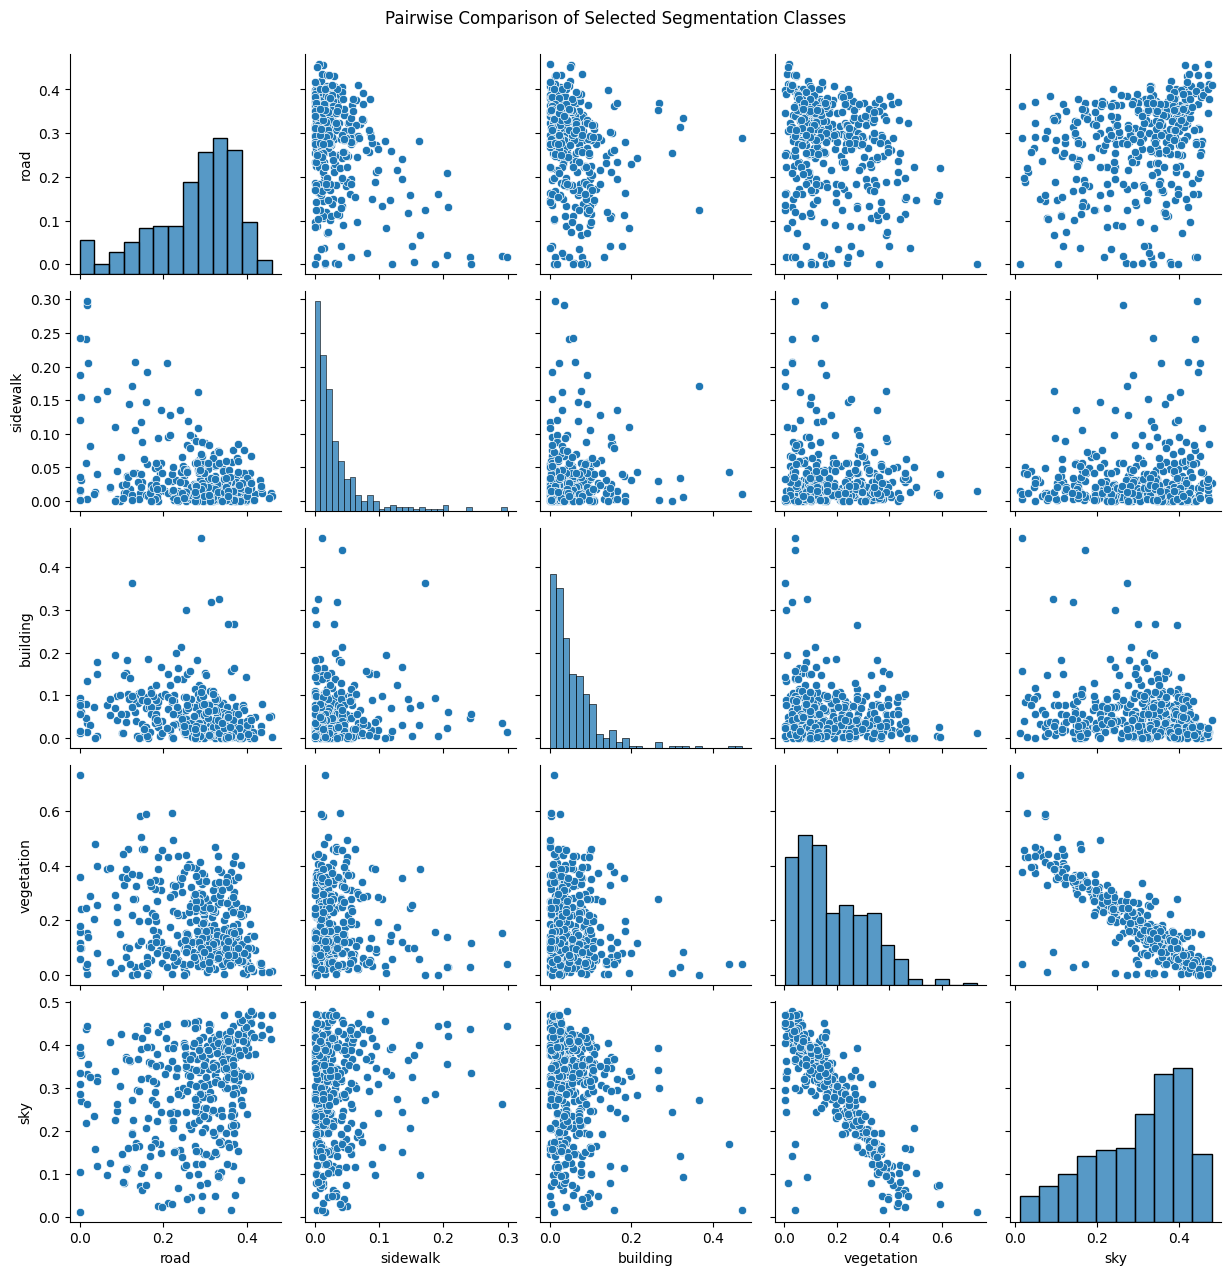

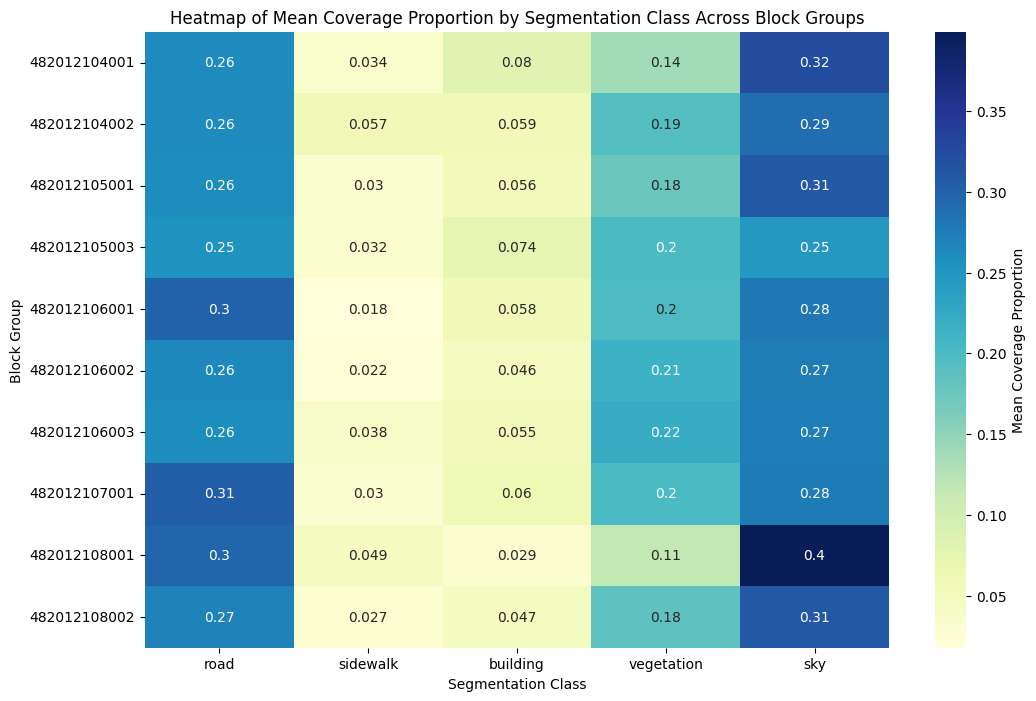

In [7]:
import seaborn as sns
import numpy as np

# Pairwise comparisons: Scatter plot matrix (pairplot) for selected segmentation classes
# Selecting a subset of features (e.g., road, sidewalk, building, vegetation, sky) for better visualization
selected_classes = ['road', 'sidewalk', 'building', 'vegetation', 'sky']

# Create a pairplot for selected segmentation classes across block groups
sns.pairplot(segmentation_df[selected_classes])
plt.suptitle("Pairwise Comparison of Selected Segmentation Classes", y=1.02)
plt.show()

# Compute the mean coverage for each block group for heatmap generation
heatmap_data = segmentation_df.groupby('block_group')[selected_classes].mean()

# Plot a heatmap of mean coverage proportions across selected segmentation classes and block groups
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Mean Coverage Proportion'})
plt.title("Heatmap of Mean Coverage Proportion by Segmentation Class Across Block Groups")
plt.xlabel("Segmentation Class")
plt.ylabel("Block Group")
plt.show()
